In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


In [5]:
df = pd.read_excel('Audio_data.xlsx')
df

,Question,Answer,Strength_N,Strength
0,In what scenario should I use mean and where s...,Mean is used to calculate the average.,-1,Low
1,What is covariance and what is correlation?,Correlation measures the strength and directio...,1,High
2,What does a correlation of 0 versus a correlat...,The respondent did not provide an explanation ...,-1,Low
3,Can you name 1 classifier which is probabilist...,Naive Bayes is a probabilistic classifier.,1,High
4,How would you go about designing a speech reco...,"Collect a dataset, extract features, and selec...",0,Medium
...,...,...,...,...
239,What is the order of sequence in which this sh...,"First, define the function using the def keywo...",1,High
240,Thank you very much.,"Thank you, Sir.",-1,Low
241,Were you tense?,Sir.,-1,Low
242,Where do tensed?,"No, Sir. Actually, the network issue and my ea...",-1,Low


In [9]:
text_data = df['Answer']
text_data

0                Mean is used to calculate the average. 
1      Correlation measures the strength and directio...
2      The respondent did not provide an explanation ...
3             Naive Bayes is a probabilistic classifier.
4      Collect a dataset, extract features, and selec...
                             ...                        
239    First, define the function using the def keywo...
240                                      Thank you, Sir.
241                                                 Sir.
242    No, Sir. Actually, the network issue and my ea...
243                    Sorry. Thank you. Thank you, Sir.
Name: Answer, Length: 244, dtype: object

In [10]:
# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data into TF-IDF features
tfidf_matrix = vectorizer.fit_transform(text_data)

# Convert the TF-IDF matrix to a DataFrame for easier viewing (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF DataFrame
print(tfidf_df.head())

   000   10   1d  1d2d   2d   3d  3rd  3x3  6x6  able  ...  words  working  \
0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0      0.0   
1  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0      0.0   
2  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0      0.0   
3  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0      0.0   
4  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0      0.0   

   works  would  yeah  yes  you  your      zero  zeros  
0    0.0    0.0   0.0  0.0  0.0   0.0  0.000000    0.0  
1    0.0    0.0   0.0  0.0  0.0   0.0  0.148378    0.0  
2    0.0    0.0   0.0  0.0  0.0   0.0  0.000000    0.0  
3    0.0    0.0   0.0  0.0  0.0   0.0  0.000000    0.0  
4    0.0    0.0   0.0  0.0  0.0   0.0  0.000000    0.0  

[5 rows x 868 columns]


In [11]:
a = tfidf_df['zero'].to_numpy()
b = df['Strength_N'].to_numpy()

a = np.array(a)
b = np.array(b)

In [12]:
def summation_unit(inputs, weights, bias=0):
    """
    Compute the weighted sum of the inputs.

    Parameters:
    - inputs: list or array of input values.
    - weights: list or array of weights corresponding to the inputs.
    - bias: optional bias term (default is 0).

    Returns:
    - Weighted sum (scalar).
    """
    return sum(i * w for i, w in zip(inputs, weights)) + bias

x = summation_unit(a, b)


In [15]:
import math

# Step function
def step_activation(x):
    return 1 if x >= 0 else 0

# Bipolar Step function
def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

# Sigmoid function
def sigmoid_activation(x):
    return 1 / (1 + math.exp(-x))

# TanH function
def tanh_activation(x):
    return math.tanh(x)

# ReLU (Rectified Linear Unit) function
def relu_activation(x):
    return max(0, x)

# Leaky ReLU function
def leaky_relu_activation(x, alpha=0.01):
    return x if x >= 0 else alpha * x


step_result = step_activation(x)
bipolar_step_result = bipolar_step_activation(x)
sigmoid_result = sigmoid_activation(x)
tanh_result = tanh_activation(x)
relu_result = relu_activation(x)
leaky_relu_result = leaky_relu_activation(x)

# Print results of activation functions
print(f"Step Activation: {step_result}")
print(f"Bipolar Step Activation: {bipolar_step_result}")
print(f"Sigmoid Activation: {sigmoid_result}")
print(f"TanH Activation: {tanh_result}")
print(f"ReLU Activation: {relu_result}")
print(f"Leaky ReLU Activation: {leaky_relu_result}")


Step Activation: 1
Bipolar Step Activation: 1
Sigmoid Activation: 0.6187763068757086
TanH Activation: 0.44972659609058085
ReLU Activation: 0.48435750524217913
Leaky ReLU Activation: 0.48435750524217913


In [16]:
def mean_squared_error(targets, predictions):
    return sum((t - p) ** 2 for t, p in zip(targets, predictions)) / len(targets)

# Absolute Error (AE)
def absolute_error(targets, predictions):
    return sum(abs(t - p) for t, p in zip(targets, predictions)) / len(targets)

targets = b  # actual Strength_N values
predictions = a  # hypothetical predictions

# Calculate Mean Squared Error
mse = mean_squared_error(targets, predictions)
print(f"Mean Squared Error: {mse}")

# Calculate Absolute Error
ae = absolute_error(targets, predictions)
print(f"Absolute Error: {ae}")


Mean Squared Error: 0.6451427462262322
Absolute Error: 0.6483405729791706


In [25]:
import numpy as np

# Define the Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.05):
        self.weights = np.random.uniform(low=-1, high=1, size=(input_size + 1))  # Random initialization
        self.learning_rate = learning_rate
        self.bias = self.weights[0]  # Bias is the weight W0

    def activation_function(self, x):
        # Multi-class activation based on threshold for 3 classes (-1, 0, 1)
        if x < -0.5:
            return -1
        elif x >= -0.5 and x < 0.5:
            return 0
        else:
            return 1

    def predict(self, inputs):
        # Compute the weighted sum (dot product) + bias
        weighted_sum = np.dot(inputs, self.weights[1:]) + self.bias
        return self.activation_function(weighted_sum)

    def update_weights(self, inputs, error):
        # Update weights and bias based on error
        self.weights[1:] += self.learning_rate * error * inputs
        self.bias += self.learning_rate * error

    def train(self, training_inputs, labels, epochs):
        for _ in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.update_weights(inputs, error)

# Define training data (example inputs from your dataset)
# Assume 'tfidf_matrix' is the input matrix, and 'Strength_N' contains the labels

training_inputs = tfidf_matrix.toarray()  # Convert to numpy array from sparse matrix
labels = df['Strength_N'].to_numpy()      # Use Strength_N column for labels

# Initialize and train the perceptron
input_size = training_inputs.shape[1]  # Number of features from TF-IDF
perceptron = Perceptron(input_size=input_size, learning_rate=0.01)

# Train for more epochs since you have a larger dataset
epochs = 100
perceptron.train(training_inputs, labels, epochs)

# Test the perceptron with a sample input from the dataset
test_input = training_inputs[0]
print("Prediction for first test input:", perceptron.predict(test_input))


Prediction for first test input: 0


In [24]:
print(df['Strength_N'].value_counts())

# print(np.unique(labels, return_counts=True))

Strength_N
-1    108
 0     86
 1     50
Name: count, dtype: int64


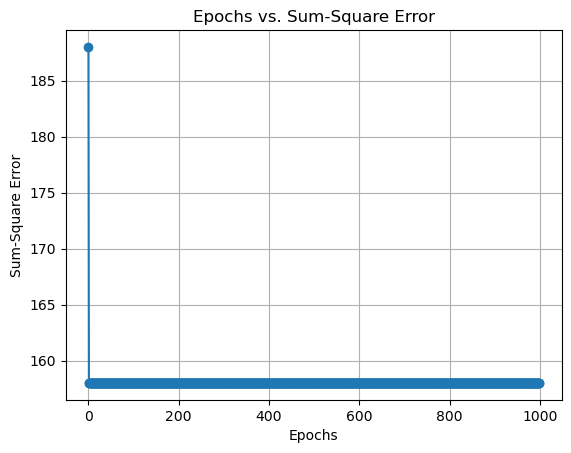

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_excel('Audio_data.xlsx')

# Assume 'Transcript' contains your text data and 'Strength_N' is the target label
text_data = df['Answer']
labels = df['Strength_N'].values

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(text_data)

# Convert the TF-IDF matrix to a NumPy array
training_inputs = tfidf_matrix.toarray()

# Define the Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.05):
        # Initialize weights and learning rate
        self.weights = np.random.rand(input_size + 1)  # +1 for bias weight
        self.learning_rate = learning_rate

    def step_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        # Compute the weighted sum
        weighted_sum = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.step_function(weighted_sum)

    def update_weights(self, inputs, error):
        # Update weights and bias based on error
        self.weights[1:] += self.learning_rate * error * inputs
        self.weights[0] += self.learning_rate * error  # Update bias

    def train(self, training_inputs, labels, max_epochs=1000, convergence_threshold=0.002):
        epoch_errors = []
        for epoch in range(max_epochs):
            total_error = 0
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.update_weights(inputs, error)
                total_error += error ** 2
            epoch_errors.append(total_error)
            if total_error <= convergence_threshold:
                print(f"Converged after {epoch + 1} epochs.")
                break
        return epoch_errors

# Initialize and train the perceptron
input_size = training_inputs.shape[1]  # Number of features
perceptron = Perceptron(input_size=input_size)

# Train the perceptron
epoch_errors = perceptron.train(training_inputs, labels)

# Plot error vs. epochs
plt.plot(range(len(epoch_errors)), epoch_errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid(True)
plt.show()


Training with step activation function...
step function converged after 131 epochs.


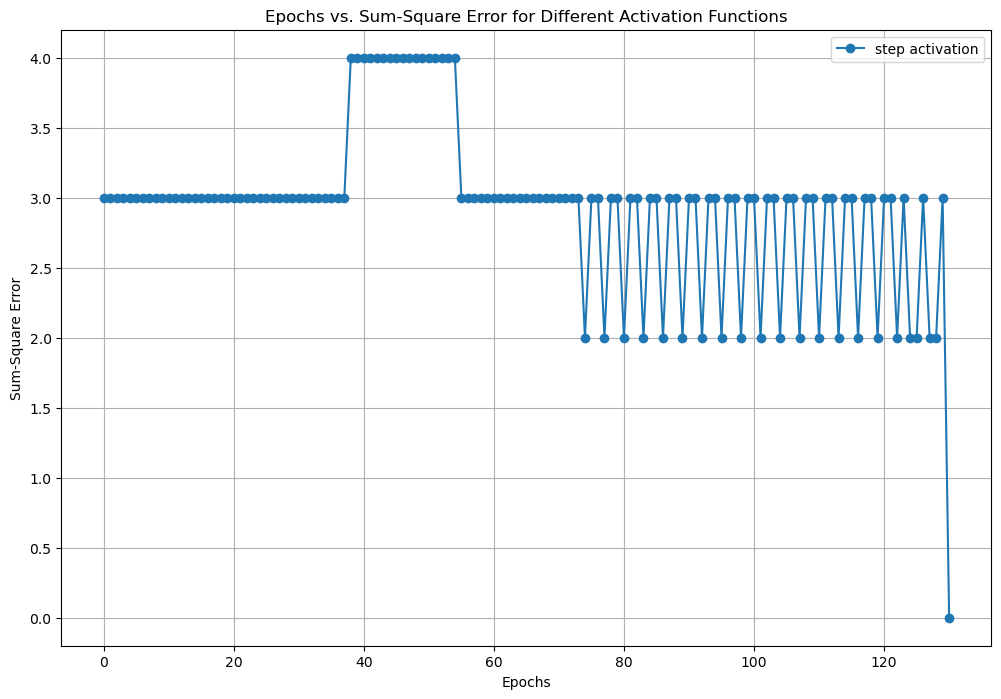

In [27]:
# To repeat the perceptron training experiment with different activation functions, you’ll need to implement the following activation functions:

# Bi-Polar Step Function: This function returns 1 if the input is greater than or equal to 0, and -1 otherwise.
# Sigmoid Function: The sigmoid function returns values between 0 and 1. The output can be transformed to fit the binary classification by scaling and shifting.
# ReLU Function: The ReLU (Rectified Linear Unit) function returns the input if it's greater than 0, and 0 otherwise.

import numpy as np
import matplotlib.pyplot as plt

# Define the Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.05, activation_function='step'):
        self.weights = np.array([10] + [0.2, -0.75])  # Initial weights (W0, W1, W2)
        self.learning_rate = learning_rate
        self.bias = self.weights[0]  # Bias is the weight W0
        self.weights = np.insert(self.weights[1:], 0, self.bias)  # Insert bias as the first weight
        self.activation_function = activation_function

    def activation(self, x):
        if self.activation_function == 'step':
            return 1 if x >= 0 else 0
        else:
            raise ValueError("Unsupported activation function")

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation(weighted_sum)

    def update_weights(self, inputs, error):
        if self.activation_function == 'sigmoid':
            # Sigmoid derivative
            prediction = self.activation(np.dot(inputs, self.weights[1:]) + self.weights[0])
            error *= prediction * (1 - prediction)
        elif self.activation_function == 'relu':
            # ReLU derivative
            prediction = self.activation(np.dot(inputs, self.weights[1:]) + self.weights[0])
            error *= 1 if prediction > 0 else 0

        self.weights[1:] += self.learning_rate * error * inputs
        self.weights[0] += self.learning_rate * error

    def train(self, training_inputs, labels, max_epochs=1000, convergence_threshold=0.002):
        epoch_errors = []
        for epoch in range(max_epochs):
            total_error = 0
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.update_weights(inputs, error)
                total_error += error ** 2
            epoch_errors.append(total_error)
            if total_error <= convergence_threshold:
                print(f"{self.activation_function} function converged after {epoch + 1} epochs.")
                break
        return epoch_errors

# Define training data for AND gate
training_inputs = np.array([
    [1, 0],
    [1, 1],
    [0, 1],
    [0, 0]
])

# Define labels for AND gate
labels = np.array([0, 1, 0, 0])

# Initialize and train perceptrons with different activation functions
activation_functions = ['step']
errors = {}

for func in activation_functions:
    print(f"Training with {func} activation function...")
    perceptron = Perceptron(input_size=2, activation_function=func)
    epoch_errors = perceptron.train(training_inputs, labels)
    errors[func] = epoch_errors

# Plot error vs. epochs for each activation function
plt.figure(figsize=(12, 8))
for func, epoch_errors in errors.items():
    plt.plot(range(len(epoch_errors)), epoch_errors, marker='o', label=f'{func} activation')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error for Different Activation Functions')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
def xor_gate(inputs, weights, activation_function):
    # Calculate the summation
    weighted_sum = summation_unit(inputs, weights)

    # Apply the activation function
    return activation_function(weighted_sum)

# Example weights for XOR (2 input XOR gate with bias term)
weights = [0.5, 0.5, -0.7]  # Example weights including bias
inputs = [1, 0]  # Example inputs for XOR

# Using Step Activation
output = xor_gate(inputs, weights, step_activation)
print(f"XOR Output (Step Activation): {output}")

# Example for error calculation
predictions = [1, 0, 1, 0]  # Example predictions
targets = [1, 0, 1, 0]  # Example targets
error = mean_squared_error(predictions, targets)
print(f"Mean Squared Error: {error}")


XOR Output (Step Activation): 1
Mean Squared Error: 0.0


In [29]:
import numpy as np

# Data
X = np.array([[20, 6, 2, 386],
              [16, 3, 6, 289],
              [27, 6, 2, 393],
              [19, 1, 2, 110],
              [24, 4, 2, 280],
              [22, 1, 5, 167],
              [15, 4, 2, 271],
              [18, 4, 2, 274],
              [21, 1, 4, 148],
              [16, 2, 4, 198]])

y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Initialize weights and bias
np.random.seed(42)
weights = np.random.randn(X.shape[1])
bias = np.random.randn()

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training the perceptron
for epoch in range(epochs):
    for i in range(X.shape[0]):
        # Forward pass
        linear_output = np.dot(X[i], weights) + bias
        prediction = sigmoid(linear_output)

        # Compute error
        error = y[i] - prediction

        # Update weights and bias
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss = {np.mean((y - sigmoid(np.dot(X, weights) + bias))**2)}')

# Make predictions
def predict(X):
    linear_output = np.dot(X, weights) + bias
    return sigmoid(linear_output) > 0.5

# Testing the model
predictions = predict(X)
print("Predictions:", predictions)
print("Actual Labels:", y)


Epoch 0: Loss = 0.6
Epoch 100: Loss = 0.6
Epoch 200: Loss = 0.39999999998254887
Epoch 300: Loss = 0.1999999998813591
Epoch 400: Loss = 0.1
Epoch 500: Loss = 0.3
Epoch 600: Loss = 3.492382207998652e-08
Epoch 700: Loss = 3.4734082479528716e-08
Epoch 800: Loss = 3.454597479450822e-08
Epoch 900: Loss = 3.435947940626133e-08
Predictions: [ True  True  True False  True False  True  True False False]
Actual Labels: [1 1 1 0 1 0 1 1 0 0]


C:\Users\sumit\AppData\Local\Temp\ipykernel_12600\2450989818.py:28: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
